In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/home/aditya/Forcasting_scheduling_project/code /open-meteo-17.25N74.12E572m.csv')

In [4]:
df.shape

(30288, 8)

In [5]:
df.head()

time  temperature_2m (°C)  relative_humidity_2m (%)  \
0  2022-01-01T00:00                 22.3                        59   
1  2022-01-01T01:00                 22.0                        61   
2  2022-01-01T02:00                 21.7                        64   
3  2022-01-01T03:00                 22.5                        62   
4  2022-01-01T04:00                 23.9                        57   

   dew_point_2m (°C)  wind_speed_10m (km/h)  cloud_cover (%)  \
0               13.9                    7.4               96   
1               14.1                    6.5              100   
2               14.6                    5.9              100   
3               14.8                    9.2              100   
4               14.8                   15.5               51   

   surface_pressure (hPa)  direct_radiation (W/m²)  
0                   950.9                      0.0  
1                   951.6                      0.0  
2                   952.5                      1.0  
3                   953.3                     27.0  
4                   953.8                    174.0

In [6]:
df['time']= pd.to_datetime(df['time'])

In [7]:
print(df.isnull().sum().sum())
print(df.duplicated().sum().sum())

0
0


In [8]:
df.isnull().sum()

time                        0
temperature_2m (°C)         0
relative_humidity_2m (%)    0
dew_point_2m (°C)           0
wind_speed_10m (km/h)       0
cloud_cover (%)             0
surface_pressure (hPa)      0
direct_radiation (W/m²)     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30288 entries, 0 to 30287
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      30288 non-null  datetime64[ns]
 1   temperature_2m (°C)       30288 non-null  float64       
 2   relative_humidity_2m (%)  30288 non-null  int64         
 3   dew_point_2m (°C)         30288 non-null  float64       
 4   wind_speed_10m (km/h)     30288 non-null  float64       
 5   cloud_cover (%)           30288 non-null  int64         
 6   surface_pressure (hPa)    30288 non-null  float64       
 7   direct_radiation (W/m²)   30288 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 1.8 MB


In [10]:
df['temp_tomorrow'] = df['temperature_2m (°C)'].shift(-24)

In [11]:
df['time_tomorrow'] = df['time'].shift(-24)

In [12]:
df[['temperature_2m (°C)', 'temp_tomorrow', 'time', 'time_tomorrow']].head(26)

temperature_2m (°C)  temp_tomorrow                time       time_tomorrow
0                  22.3           19.0 2022-01-01 00:00:00 2022-01-02 00:00:00
1                  22.0           18.8 2022-01-01 01:00:00 2022-01-02 01:00:00
2                  21.7           19.1 2022-01-01 02:00:00 2022-01-02 02:00:00
3                  22.5           21.5 2022-01-01 03:00:00 2022-01-02 03:00:00
4                  23.9           23.8 2022-01-01 04:00:00 2022-01-02 04:00:00
5                  25.1           25.7 2022-01-01 05:00:00 2022-01-02 05:00:00
6                  25.9           27.3 2022-01-01 06:00:00 2022-01-02 06:00:00
7                  26.8           28.2 2022-01-01 07:00:00 2022-01-02 07:00:00
8                  27.5           28.8 2022-01-01 08:00:00 2022-01-02 08:00:00
9                  27.8           29.1 2022-01-01 09:00:00 2022-01-02 09:00:00
10                 27.8           29.3 2022-01-01 10:00:00 2022-01-02 10:00:00
11                 27.3           29.2 2022-01-01 11:00:00 2022-01-02 11:00:00
12                 26.2           27.7 2022-01-01 12:00:00 2022-01-02 12:00:00
13                 24.1           25.6 2022-01-01 13:00:00 2022-01-02 13:00:00
14                 23.4           25.9 2022-01-01 14:00:00 2022-01-02 14:00:00
15                 22.7           25.4 2022-01-01 15:00:00 2022-01-02 15:00:00
16                 22.3           25.1 2022-01-01 16:00:00 2022-01-02 16:00:00
17                 22.3           24.8 2022-01-01 17:00:00 2022-01-02 17:00:00
18                 21.7           24.0 2022-01-01 18:00:00 2022-01-02 18:00:00
19                 21.0           23.3 2022-01-01 19:00:00 2022-01-02 19:00:00
20                 20.4           22.7 2022-01-01 20:00:00 2022-01-02 20:00:00
21                 20.0           22.1 2022-01-01 21:00:00 2022-01-02 21:00:00
22                 19.7           20.9 2022-01-01 22:00:00 2022-01-02 22:00:00
23                 19.6           20.4 2022-01-01 23:00:00 2022-01-02 23:00:00
24                 19.0           20.2 2022-01-02 00:00:00 2022-01-03 00:00:00
25                 18.8           19.6 2022-01-02 01:00:00 2022-01-03 01:00:00

In [13]:
'''df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
'''

"df['hour'] = df['time'].dt.hour\ndf['day'] = df['time'].dt.day\ndf['month'] = df['time'].dt.month\ndf['year'] = df['time'].dt.year\n"

In [14]:
df['time'].dt.year.value_counts().sort_index()

time
2022    8760
2023    8760
2024    8784
2025    3984
Name: count, dtype: int64

### Univariate analysis

In [15]:
print("unique values \n", df.nunique())

unique values 
 time                        30288
temperature_2m (°C)           343
relative_humidity_2m (%)       94
dew_point_2m (°C)             272
wind_speed_10m (km/h)         350
cloud_cover (%)               103
surface_pressure (hPa)        212
direct_radiation (W/m²)       939
temp_tomorrow                 343
time_tomorrow               30264
dtype: int64


In [16]:
df.isnull().sum()

time                         0
temperature_2m (°C)          0
relative_humidity_2m (%)     0
dew_point_2m (°C)            0
wind_speed_10m (km/h)        0
cloud_cover (%)              0
surface_pressure (hPa)       0
direct_radiation (W/m²)      0
temp_tomorrow               24
time_tomorrow               24
dtype: int64

In [17]:
df = df.dropna()

In [18]:
df.select_dtypes(include='number').describe().T

count        mean         std    min    25%  \
temperature_2m (°C)       30264.0   25.095384    5.496195    5.5   22.1   
relative_humidity_2m (%)  30264.0   66.439631   23.959840    7.0   47.0   
dew_point_2m (°C)         30264.0   16.928889    4.985598   -3.4   13.4   
wind_speed_10m (km/h)     30264.0    7.378215    5.543512    0.0    3.2   
cloud_cover (%)           30264.0   57.898625   38.910145   -1.0   16.0   
surface_pressure (hPa)    30264.0  946.293028    3.316329  935.1  944.0   
direct_radiation (W/m²)   30264.0  156.046689  245.298826    0.0    0.0   
temp_tomorrow             30264.0   25.096220    5.495593    5.5   22.1   

                            50%    75%    max  
temperature_2m (°C)        24.5   28.5   41.5  
relative_humidity_2m (%)   72.0   87.0  100.0  
dew_point_2m (°C)          18.4   21.1   25.5  
wind_speed_10m (km/h)       5.6   10.4   39.5  
cloud_cover (%)            64.0  100.0  101.0  
surface_pressure (hPa)    946.4  948.6  956.6  
direct_radiation (W/m²)     1.0  259.0  951.0  
temp_tomorrow              24.5   28.5   41.5

In [19]:
print("unique values \n", df.nunique())

unique values 
 time                        30264
temperature_2m (°C)           343
relative_humidity_2m (%)       94
dew_point_2m (°C)             272
wind_speed_10m (km/h)         350
cloud_cover (%)               103
surface_pressure (hPa)        211
direct_radiation (W/m²)       939
temp_tomorrow                 343
time_tomorrow               30264
dtype: int64


In [20]:
df['cloud_cover (%)'] = df['cloud_cover (%)'].apply(
    lambda x: 0 if x < 0 else 100 if x > 100 else x
)


In [21]:
df.select_dtypes(include='number').describe().T

count        mean         std    min    25%  \
temperature_2m (°C)       30264.0   25.095384    5.496195    5.5   22.1   
relative_humidity_2m (%)  30264.0   66.439631   23.959840    7.0   47.0   
dew_point_2m (°C)         30264.0   16.928889    4.985598   -3.4   13.4   
wind_speed_10m (km/h)     30264.0    7.378215    5.543512    0.0    3.2   
cloud_cover (%)           30264.0   57.898692   38.909960    0.0   16.0   
surface_pressure (hPa)    30264.0  946.293028    3.316329  935.1  944.0   
direct_radiation (W/m²)   30264.0  156.046689  245.298826    0.0    0.0   
temp_tomorrow             30264.0   25.096220    5.495593    5.5   22.1   

                            50%    75%    max  
temperature_2m (°C)        24.5   28.5   41.5  
relative_humidity_2m (%)   72.0   87.0  100.0  
dew_point_2m (°C)          18.4   21.1   25.5  
wind_speed_10m (km/h)       5.6   10.4   39.5  
cloud_cover (%)            64.0  100.0  100.0  
surface_pressure (hPa)    946.4  948.6  956.6  
direct_radiation (W/m²)     1.0  259.0  951.0  
temp_tomorrow              24.5   28.5   41.5

/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Figure size 640x480 with 0 Axes>

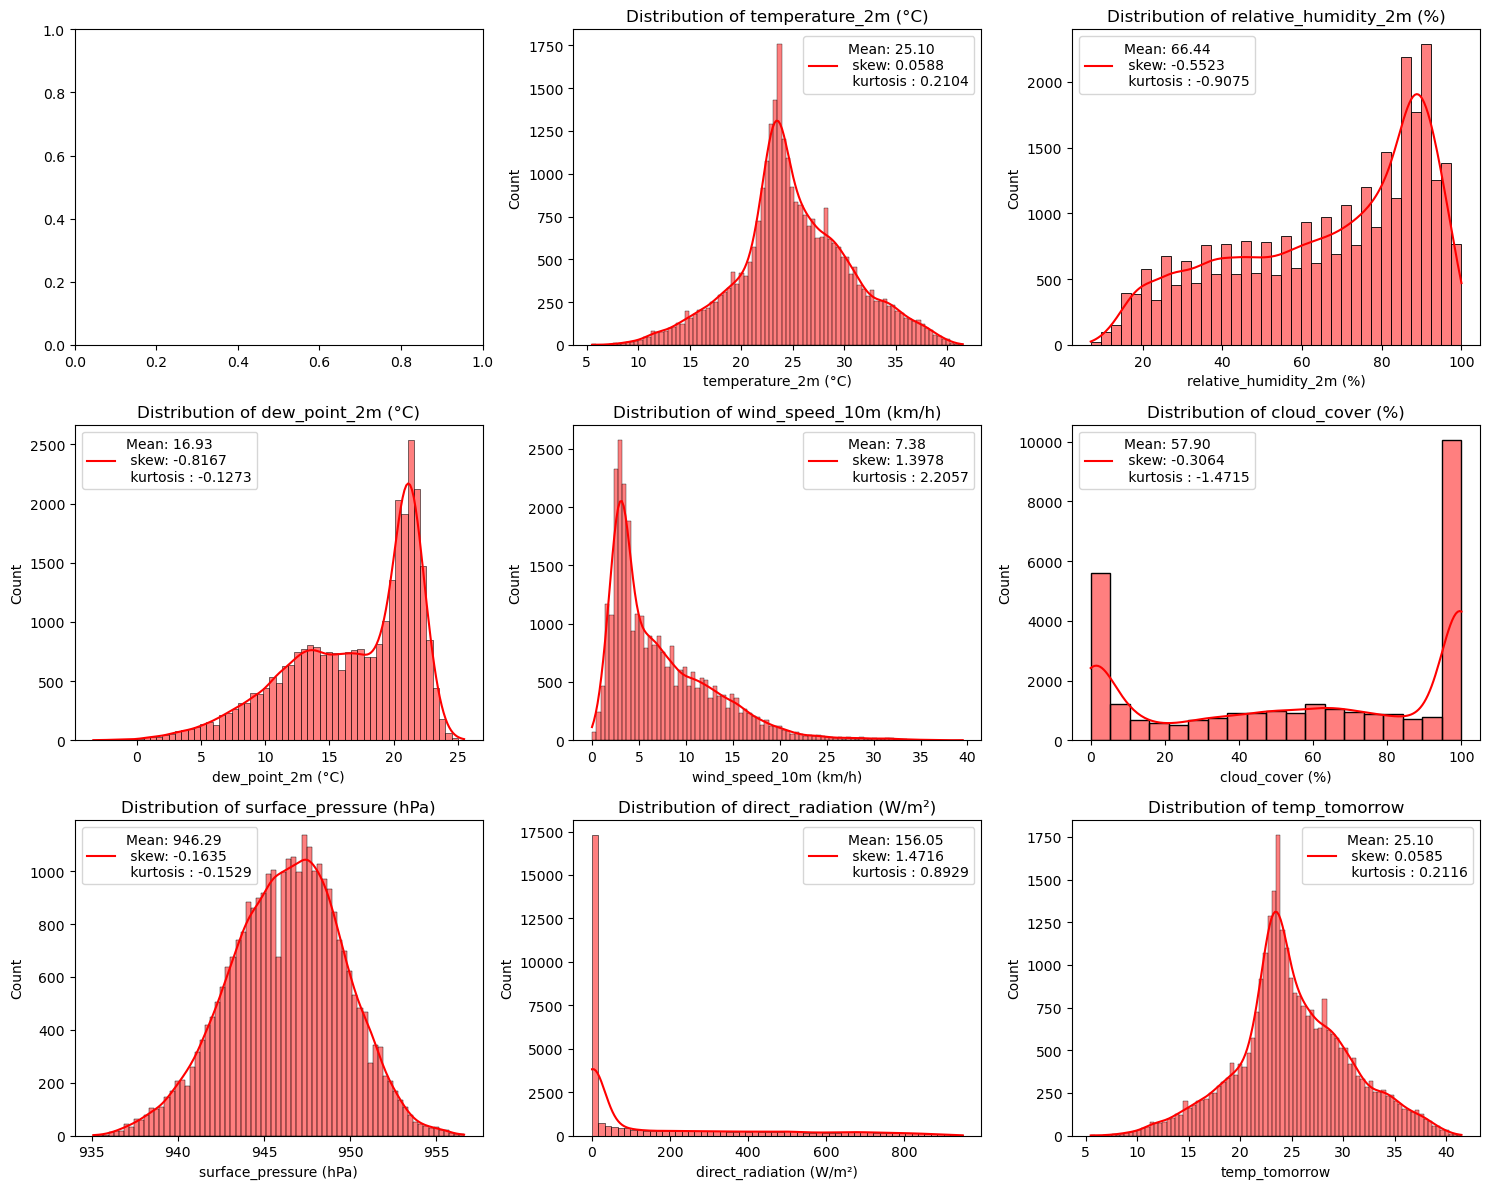

In [22]:
plt.figure()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(data=df, x=col, kde=True, color='red', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].legend([f"Mean: {df[col].mean():.2f} \n skew: {round(df[col].skew(),4)} \n kurtosis : {round(df[col].kurtosis(),4)}"])


plt.tight_layout()
plt.show()

/tmp/ipykernel_43030/2004443887.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, color='purple', ax=axes[i])
/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_43030/2004443887.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` 

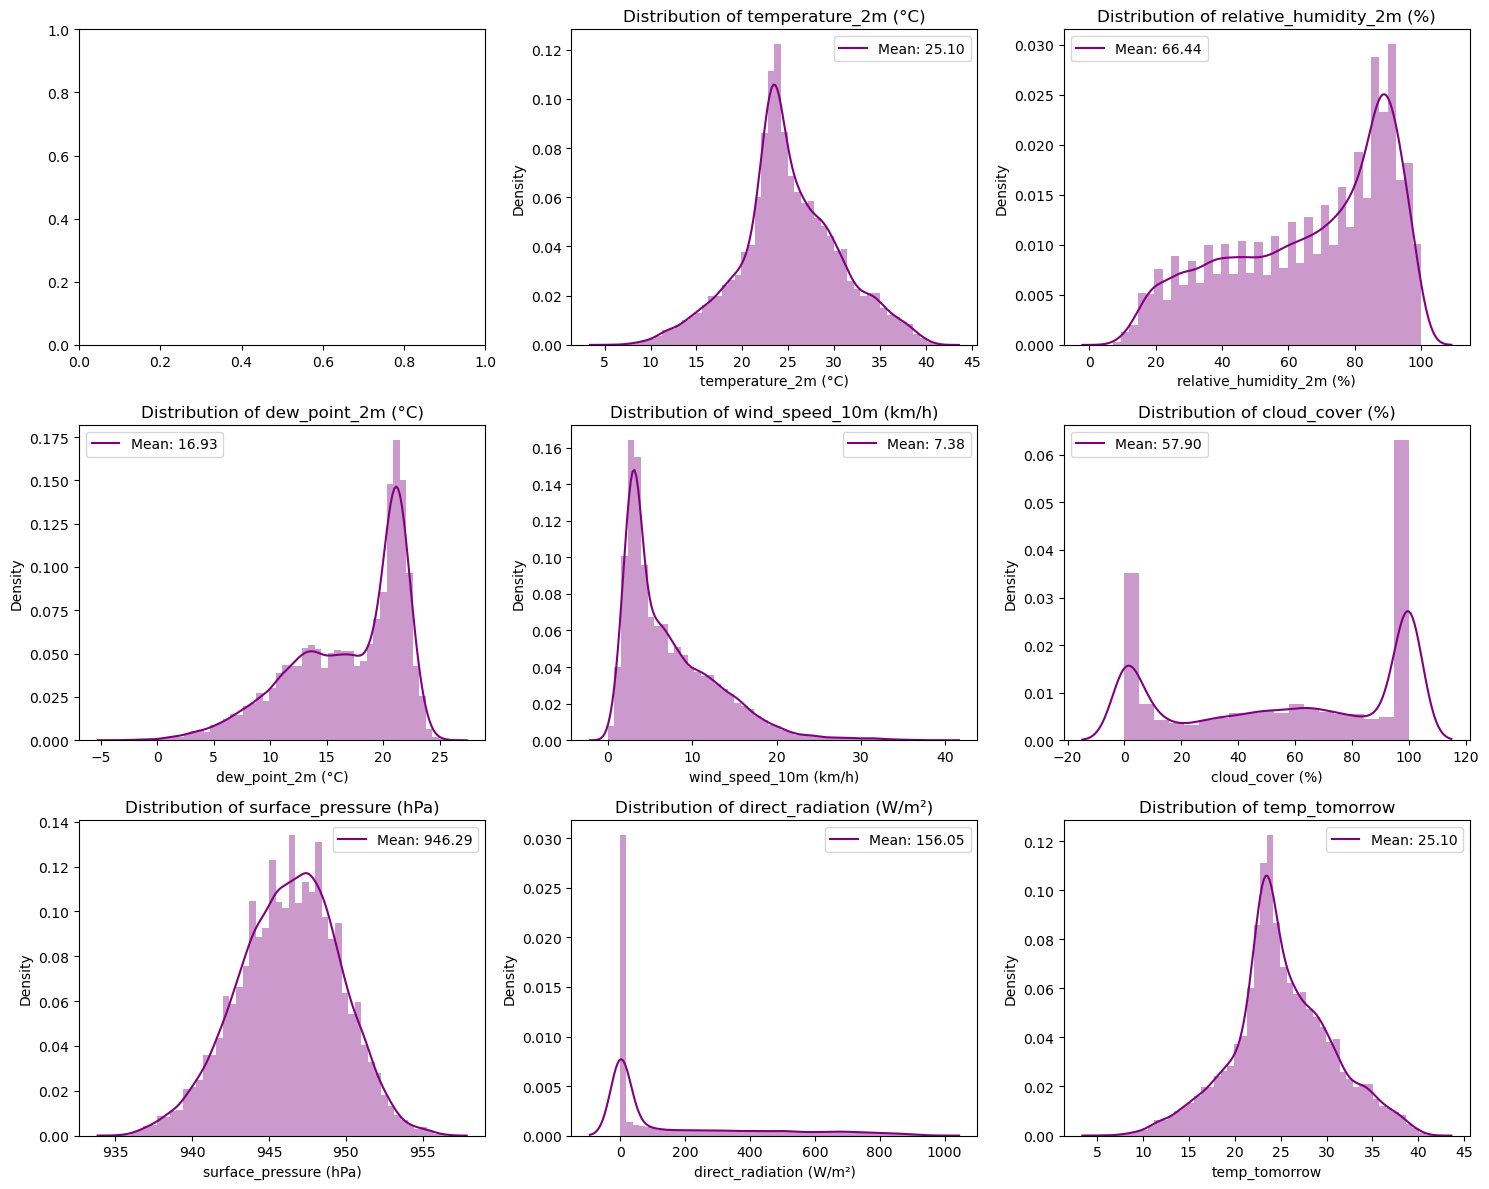

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.distplot(df[col], kde=True, color='purple', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].legend([f"Mean: {df[col].mean():.2f}"])
        
plt.tight_layout()
plt.show()

### Bivariate analysis

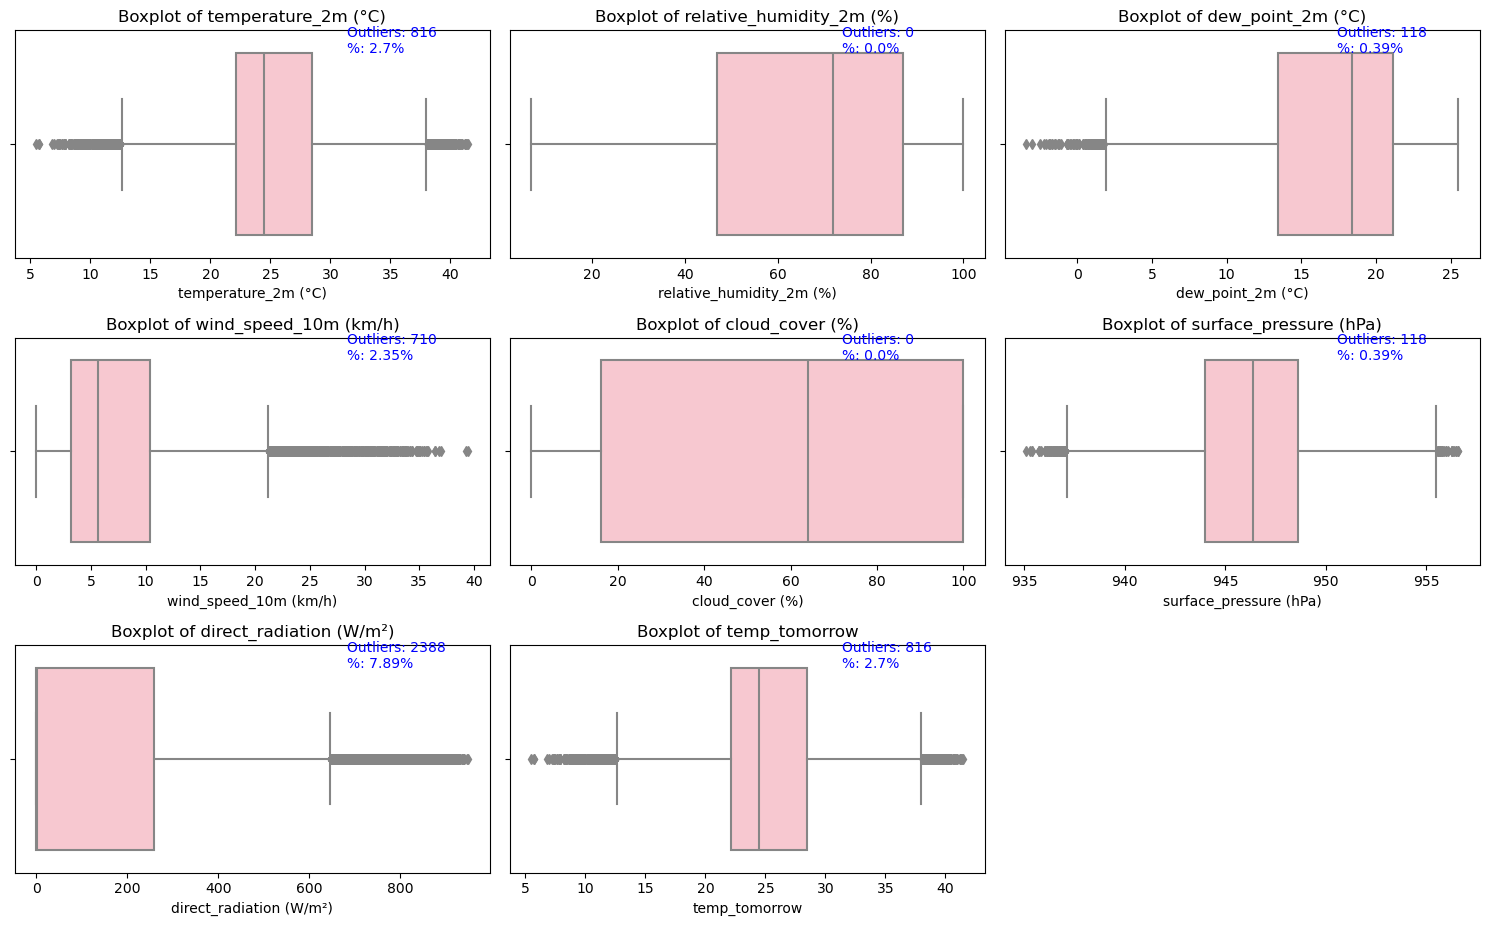

In [24]:
def outlier_percentage(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]
    outlier_pct = (len(outliers) / len(series)) * 100

    return round(outlier_pct, 2), len(outliers)  



plt.figure(figsize=(15, 12))
numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[col], color='pink')
    
    outlier_pct, total_outliers = outlier_percentage(df[col])
    plt.title(f'Boxplot of {col}')
    
    # Add outlier info as text inside plot
    plt.text(
        x=0.7, y=0.9, s=f"Outliers: {total_outliers}\n%: {outlier_pct}%",
        transform=plt.gca().transAxes, fontsize=10, color='blue'
    )

plt.tight_layout()
plt.show()


### Bivariate analysis

<Axes: >

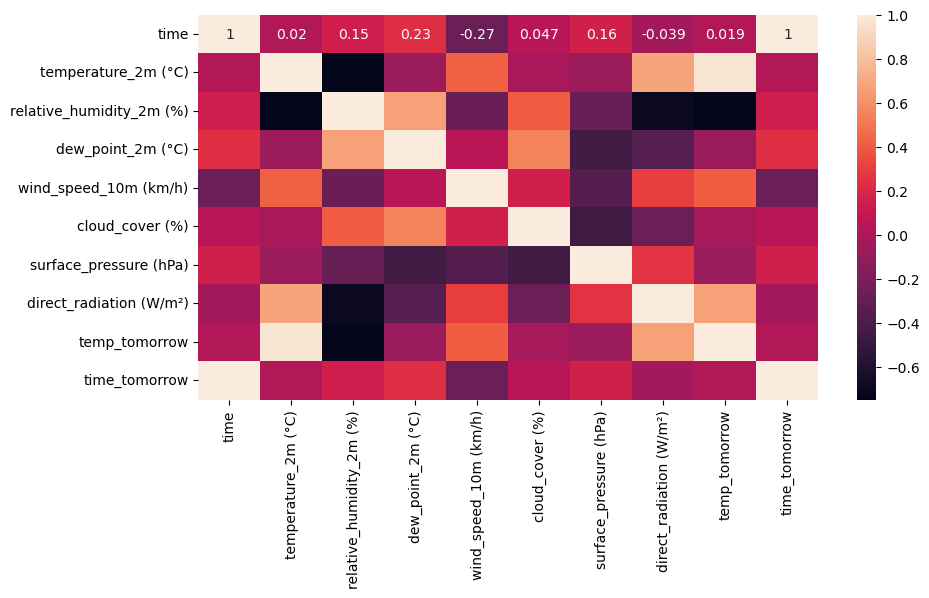

In [25]:
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(df.corr(), ax = ax, annot = True)

In [26]:
corr_series = df.corr(numeric_only=True)['temp_tomorrow'].sort_values()
corr_series.sort_values(ascending=False)

temp_tomorrow               1.000000
temperature_2m (°C)         0.967855
direct_radiation (W/m²)     0.668646
wind_speed_10m (km/h)       0.411320
cloud_cover (%)            -0.031089
surface_pressure (hPa)     -0.066828
dew_point_2m (°C)          -0.074775
relative_humidity_2m (%)   -0.728662
Name: temp_tomorrow, dtype: float64

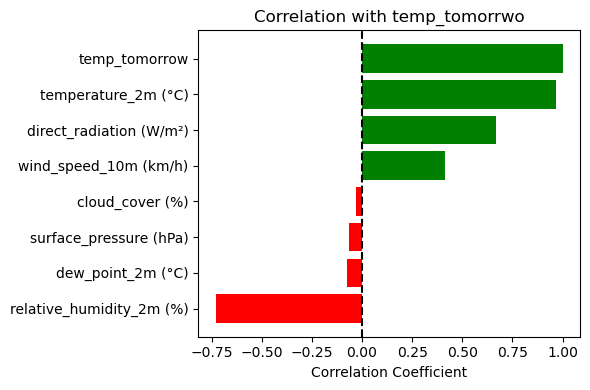

In [27]:
plt.figure(figsize=(6, 4))
plt.barh(corr_series.index, corr_series.values, color=['red' if x < 0 else 'green' for x in corr_series.values])
plt.title('Correlation with temp_tomorrwo')
plt.xlabel('Correlation Coefficient')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

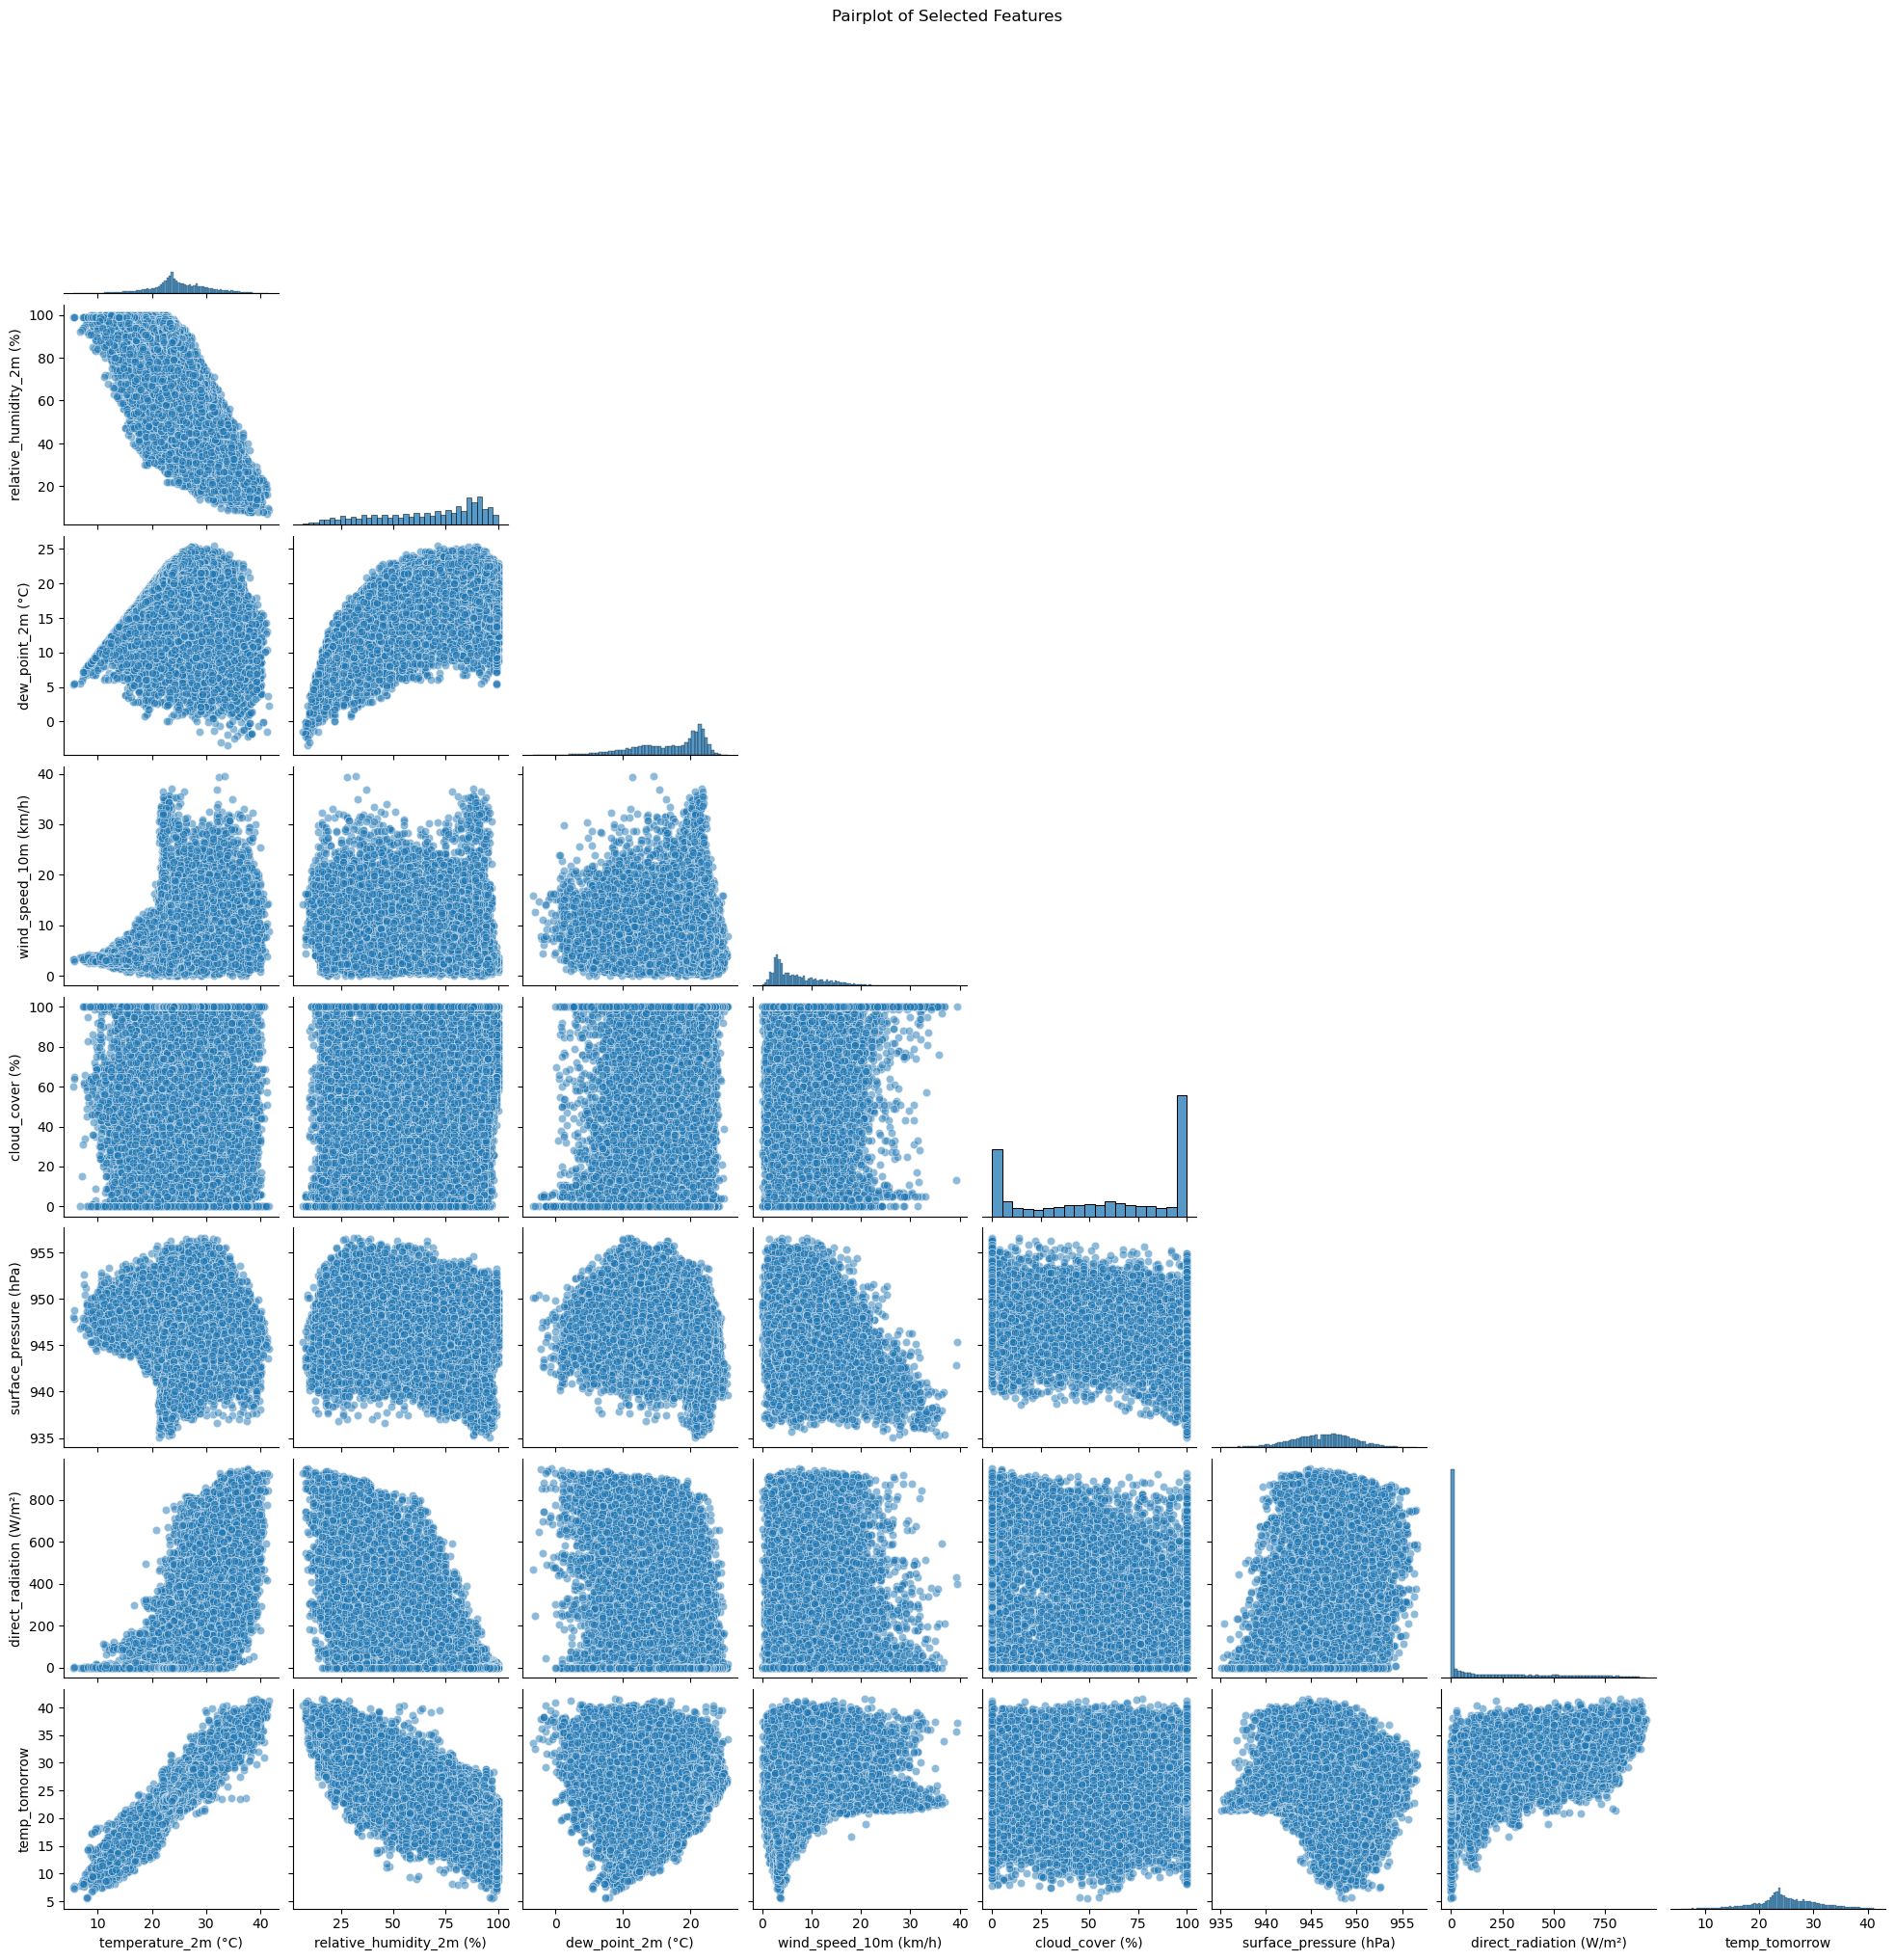

In [28]:

# Create the pairplot
sns.pairplot(df, kind='scatter', corner=True, plot_kws={'alpha': 0.5})

plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [29]:
df.head()

time  temperature_2m (°C)  relative_humidity_2m (%)  \
0 2022-01-01 00:00:00                 22.3                        59   
1 2022-01-01 01:00:00                 22.0                        61   
2 2022-01-01 02:00:00                 21.7                        64   
3 2022-01-01 03:00:00                 22.5                        62   
4 2022-01-01 04:00:00                 23.9                        57   

   dew_point_2m (°C)  wind_speed_10m (km/h)  cloud_cover (%)  \
0               13.9                    7.4               96   
1               14.1                    6.5              100   
2               14.6                    5.9              100   
3               14.8                    9.2              100   
4               14.8                   15.5               51   

   surface_pressure (hPa)  direct_radiation (W/m²)  temp_tomorrow  \
0                   950.9                      0.0           19.0   
1                   951.6                      0.0           18.8   
2                   952.5                      1.0           19.1   
3                   953.3                     27.0           21.5   
4                   953.8                    174.0           23.8   

        time_tomorrow  
0 2022-01-02 00:00:00  
1 2022-01-02 01:00:00  
2 2022-01-02 02:00:00  
3 2022-01-02 03:00:00  
4 2022-01-02 04:00:00

In [30]:
'''from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler())
])
'''

"from sklearn.pipeline import Pipeline\n\npipeline = Pipeline([\n    ('scaler', StandardScaler())\n])\n"

In [31]:
## Transformation 
def winsorize_column(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return col.clip(lower=lower_bound, upper=upper_bound)


features = df.drop(columns=['time', 'temp_tomorrow','time_tomorrow'], errors='ignore')
features = features.apply(winsorize_column)

df_transformed = features.copy()
df_transformed['temp_tomorrow'] = df['temp_tomorrow'].values

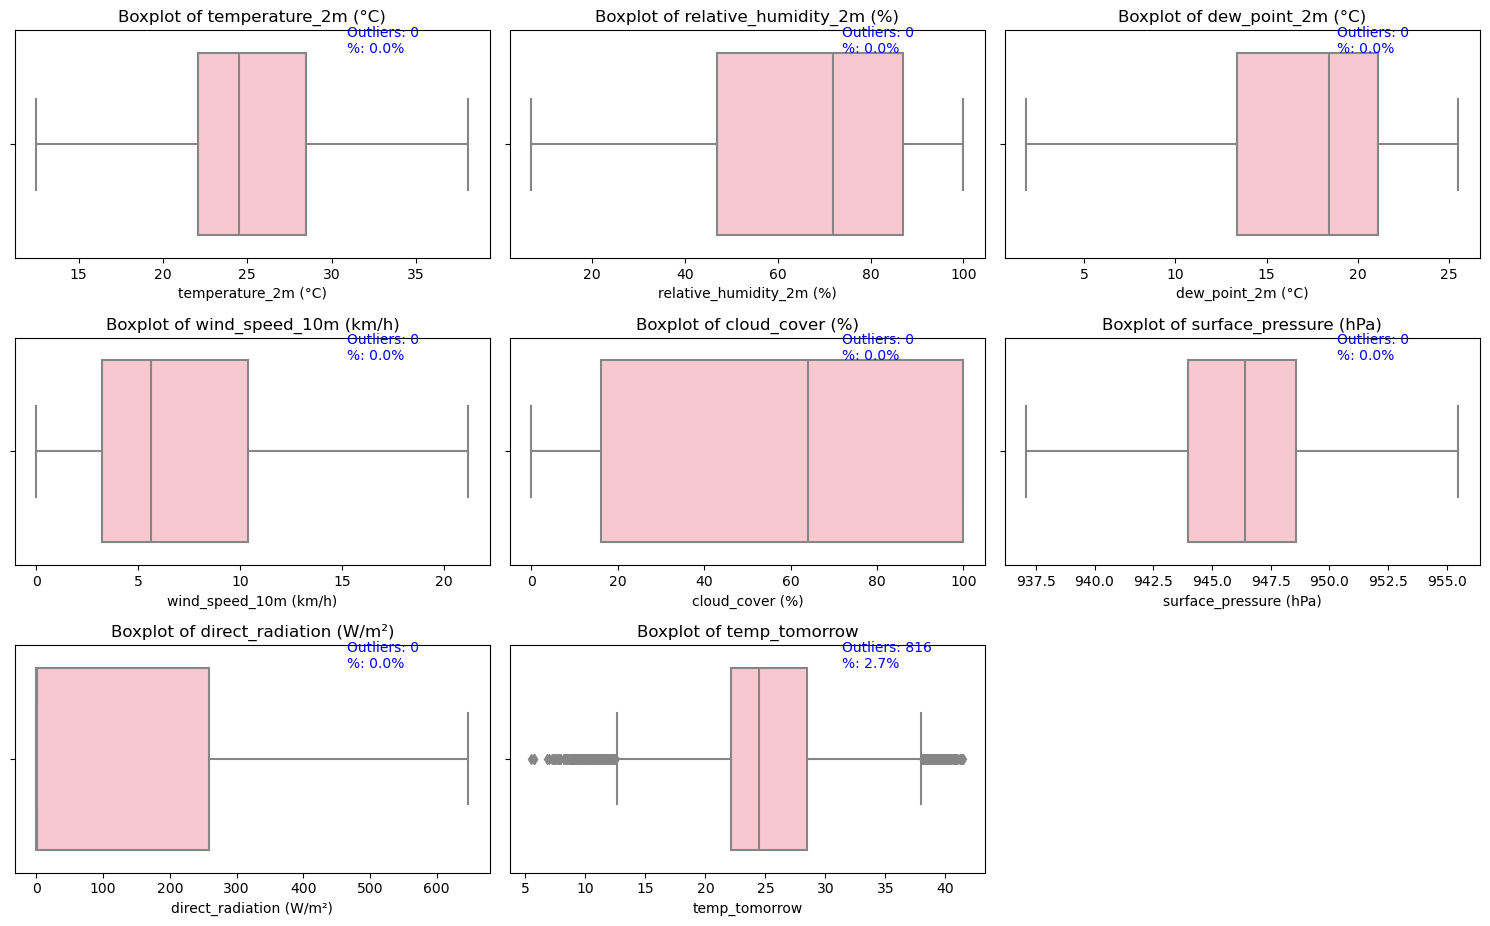

In [32]:
def outlier_percentage(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]
    outlier_pct = (len(outliers) / len(series)) * 100

    return round(outlier_pct, 2), len(outliers)  



plt.figure(figsize=(15, 12))
numeric_cols = [col for col in df_transformed.columns if pd.api.types.is_numeric_dtype(df_transformed[col])]

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df_transformed[col], color='pink')
    
    outlier_pct, total_outliers = outlier_percentage(df_transformed[col])
    plt.title(f'Boxplot of {col}')
    
    # Add outlier info as text inside plot
    plt.text(
        x=0.7, y=0.9, s=f"Outliers: {total_outliers}\n%: {outlier_pct}%",
        transform=plt.gca().transAxes, fontsize=10, color='blue'
    )

plt.tight_layout()
plt.show()


In [33]:
def fix_skewness(df, threshold=0.5):
    df_fixed = df.copy()
    skewed_cols = []

    for col in df.columns:
        if df[col].dtype != 'float64' and df[col].dtype != 'int64' and col != 'temp_tomorrow':
            continue  

        col_skew = skew(df[col].dropna())
        if abs(col_skew) > threshold:
            skewed_cols.append((col, col_skew))


            if (df[col] >= 0).all():
                df_fixed[col] = np.log1p(df[col])
            else:
                
                df_fixed[col] = np.sqrt(df[col] - df[col].min() + 1)

    return df_fixed, skewed_cols


In [34]:
df_transformed, skewed_cols =  fix_skewness(df)

/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aditya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Figure size 640x480 with 0 Axes>

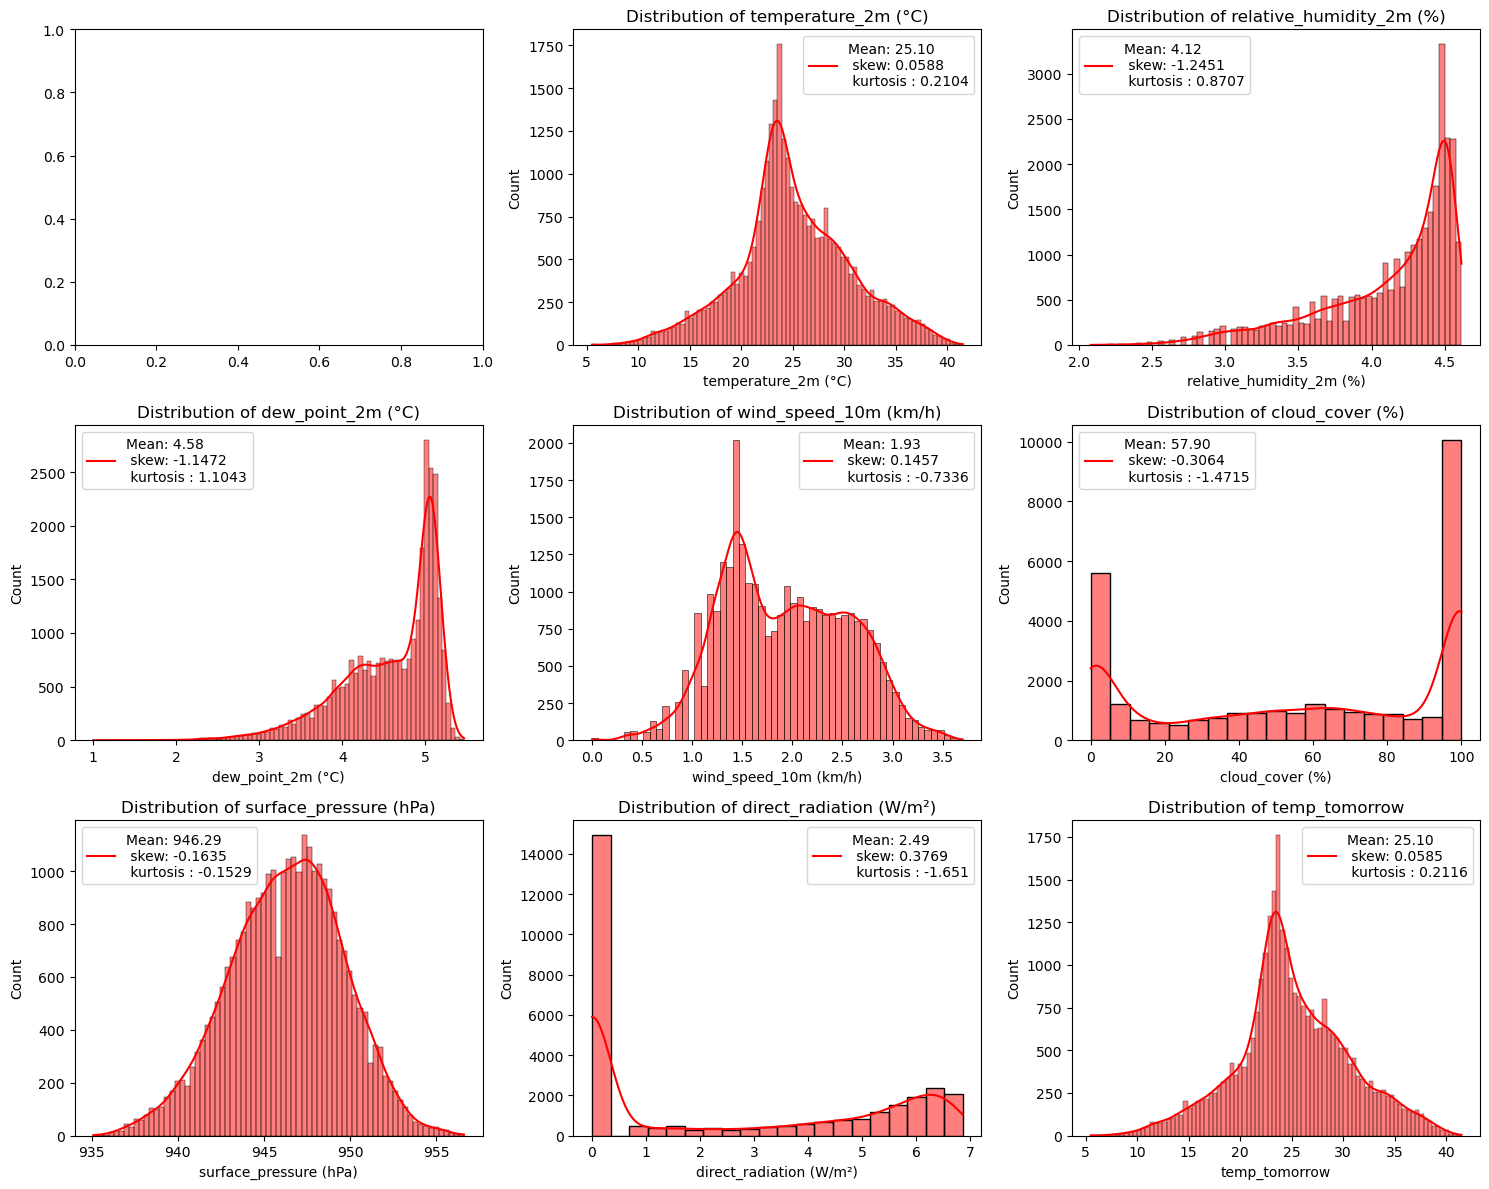

In [35]:
plt.figure()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(data=df_transformed, x=col, kde=True, color='red', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].legend([f"Mean: {df_transformed[col].mean():.2f} \n skew: {round(df_transformed[col].skew(),4)} \n kurtosis : {round(df_transformed[col].kurtosis(),4)}"])


plt.tight_layout()
plt.show()

In [36]:
skewed_cols

[('relative_humidity_2m (%)', -0.5522463749105623),
 ('dew_point_2m (°C)', -0.816643533069571),
 ('wind_speed_10m (km/h)', 1.3976910088180743),
 ('direct_radiation (W/m²)', 1.4714820398268613)]

In [37]:
df_transformed.head()

time  temperature_2m (°C)  relative_humidity_2m (%)  \
0 2022-01-01 00:00:00                 22.3                  4.094345   
1 2022-01-01 01:00:00                 22.0                  4.127134   
2 2022-01-01 02:00:00                 21.7                  4.174387   
3 2022-01-01 03:00:00                 22.5                  4.143135   
4 2022-01-01 04:00:00                 23.9                  4.060443   

   dew_point_2m (°C)  wind_speed_10m (km/h)  cloud_cover (%)  \
0           4.277850               2.128232               96   
1           4.301163               2.014903              100   
2           4.358899               1.931521              100   
3           4.381780               2.322388              100   
4           4.381780               2.803360               51   

   surface_pressure (hPa)  direct_radiation (W/m²)  temp_tomorrow  \
0                   950.9                 0.000000           19.0   
1                   951.6                 0.000000           18.8   
2                   952.5                 0.693147           19.1   
3                   953.3                 3.332205           21.5   
4                   953.8                 5.164786           23.8   

        time_tomorrow  
0 2022-01-02 00:00:00  
1 2022-01-02 01:00:00  
2 2022-01-02 02:00:00  
3 2022-01-02 03:00:00  
4 2022-01-02 04:00:00

In [38]:
x = df_transformed.iloc[:, 1: 8]
y = df_transformed['temp_tomorrow']

print("x type ",type(x))
print("y type",type(y))

x type  <class 'pandas.core.frame.DataFrame'>
y type <class 'pandas.core.series.Series'>


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
print(f"x_train_shpae : {x_train.shape}")
print(f"x_test_shpae : {x_test.shape}")
print(f"y_train_shpae : {y_train.shape}")
print(f"y_test_shpae : {y_test.shape}")

x_train_shpae : (24211, 7)
x_test_shpae : (6053, 7)
y_train_shpae : (24211,)
y_test_shpae : (6053,)


In [40]:
## Scaling 
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)    

### Model building

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
#import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-6))) * 100

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42),
    #"XGBoost": xgb.XGBRegressor(random_state=42)
}

In [45]:
import time

results = {}

for name, model in models.items():
    start = time.time()
    
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    
    end = time.time()
    elapsed_time = end - start

    r2 = r2_score(y_test, y_pred)
    n, k = x_test.shape
    adj_r2 = adjusted_r2(r2, n, k)

    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R² Score": r2,
        "Adjusted R²": adj_r2,
        "MAPE (%)": mean_absolute_percentage_error(y_test, y_pred),
        "Time Taken (s)": round(elapsed_time, 3)
    }


In [46]:
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")
print("\nModel Evaluation Metrics:")
print(results_df.round(4))


Model Evaluation Metrics:
                             MAE     MSE    RMSE  R² Score  Adjusted R²  \
Support Vector Regressor  0.9117  1.7256  1.3136    0.9415       0.9415   
Gradient Boosting         0.9256  1.7344  1.3170    0.9412       0.9412   
MLP Regressor             0.9398  1.7517  1.3235    0.9407       0.9406   
Random Forest             0.9316  1.7627  1.3277    0.9403       0.9402   
Linear Regression         0.9397  1.8226  1.3500    0.9383       0.9382   
KNN Regressor             0.9868  1.8788  1.3707    0.9364       0.9363   

                          MAPE (%)  Time Taken (s)  
Support Vector Regressor    3.9838          28.213  
Gradient Boosting           4.0219           2.169  
MLP Regressor               4.1333          10.548  
Random Forest               4.0226           8.239  
Linear Regression           4.0852           0.006  
KNN Regressor               4.2475           0.104  


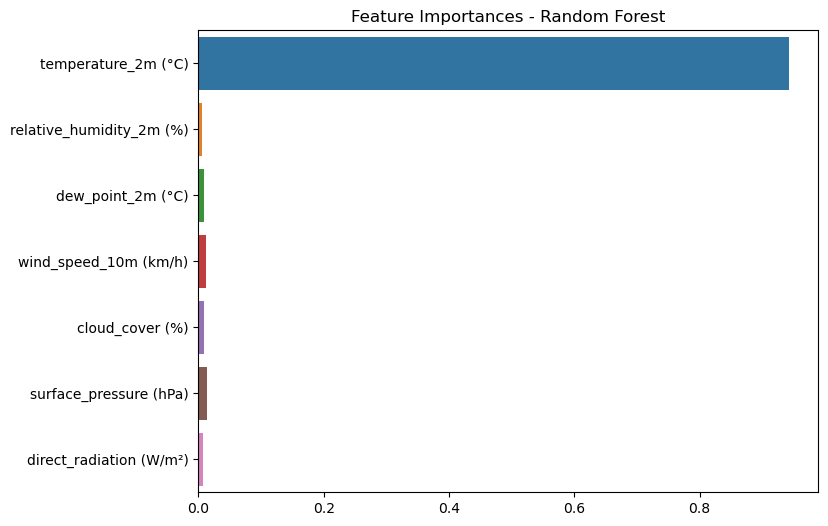

In [47]:
model = models["Random Forest"]
importances = model.feature_importances_
feature_names = x.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances - Random Forest")
plt.show()